# Titanic: Machine Learning from Disaster
  
<div width='100%' style="margin:20px">
    <img src="ship.png"/>
    <p style='text-align:center'>Icon made by Freepik from <a href="www.flaticon.com">www.flaticon.com</a></p>
</div>
  
The sinking of the Titanic is one of the most infamous shipwrecks in history.  
  
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.  
  
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.  
  
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (id, name, age, gender, socio-economic class, etc).

Text by [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

## The data we have

`train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.  
  
The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.  

## Starting the job


In [251]:
# Importing libraries that will be used in this step

# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting the dark grid for seaborn plots
sns.set(style="darkgrid") 

# Machine Learning Algorithms
# We'll explain each of these algorithms later
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### First look at the data (`train.csv` and `test.csv`)
Let's see the number of rows and columns for each dataset.

In [252]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

shapes = pd.DataFrame({ 'Train': df_train.shape, 'Test': df_test.shape}, index=['Linhas', 'Colunas'])
shapes

,Train,Test
Linhas,891,418
Colunas,12,11


In [253]:
print('Columns of train DataFrame: {} \n'.format(df_train.columns.values))
print('Columns of test DataFrame: {}'.format(df_test.columns.values))

Columns of train DataFrame: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] 

Columns of test DataFrame: ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


As seen above, the differences between train and test datasets are in the `Survived` column that does not exist in the test dataframe. It's our job predict this column in test dataset.

### Explaining the columns we have


Variable | Definition | Key
:-- | :--: | :--
passengerid | Unique identification of each passenger | 
survived | Variable that identifies whether or not the passenger survived the shipwreck | 0 = No, 1 = Yes
pclass | Passenger ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Passenger gender |	
age| Passenger age | in years	
sibsp| # of siblings / spouses aboard the Titanic |	
parch | # of parents / children aboard the Titanic |	
ticket | Ticket number | 	
fare | Passenger fare | 
cabin | Cabin number |	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

### Exploring DataFrame info
Well, now let's look at the dataset information, its columns, types and entries.

In [254]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [255]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Witch features are categorical?
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
* Categorical: Survived, Sex, and Embarked. 
* Ordinal: Pclass.  

#### Witch features are numerical?
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
* Continous: Age, Fare. 
* Discrete: SibSp, Parch.  
  
In this case we can ignore PassengerId, because this is just a key column. Cabin and Name are columns that do not have interesting plots. So we can ignore these two columns for now. In the near future we will use the Name column to treat the Age column. But this is for later.

### Now let's look at how the data is

In [256]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Like we see in info methods above, we have some missing values in this dataset. Lets check them.

### Checking missing values

In [258]:
missing_data = {}
for column in df_train.columns:
    missing_data[column] = [df_train[column].isnull().sum(), df_train[column].count()]

missing_values = pd.DataFrame(missing_data, index=['Missing Values', 'Total Values'])
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing Values,0,0,0,0,0,177,0,0,0,0,687,2
Total Values,891,891,891,891,891,714,891,891,891,891,204,889


In [259]:
missing_data = {}
for column in df_test.columns:
    missing_data[column] = [df_test[column].isnull().sum(), df_test[column].count()]

missing_values = pd.DataFrame(missing_data, index=['Missing Values', 'Total Values'])
missing_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing Values,0,0,0,0,86,0,0,0,1,327,0
Total Values,418,418,418,418,332,418,418,418,417,91,418


Now lets see this numbers in percentage.

In [260]:
missing_data = {}

for column in df_train.columns:
    percentage = (df_train[column].isnull().sum() / df_train.shape[0]) * 100
    missing_data[column] = round(percentage, 2)

missing_values = pd.DataFrame(missing_data, index=['Missing Values %'])
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing Values %,0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


In [261]:
missing_data = {}

for column in df_test.columns:
    percentage = (df_test[column].isnull().sum() / df_test.shape[0]) * 100
    missing_data[column] = round(percentage, 2)
    
missing_values = pd.DataFrame(missing_data, index=['Missing Values %'])
missing_values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing Values %,0.0,0.0,0.0,0.0,20.57,0.0,0.0,0.0,0.24,78.23,0.0


Let's check only the columns that have missing values

In [262]:
print('--- Train dataset ---')
for column in df_train.columns:
    if df_train[column].isnull().sum() > 0:
        print(column)
print('\n--- Test dataset ---')
for column in df_test.columns:
    if df_test[column].isnull().sum() > 0:
        print(column)

--- Train dataset ---
Age
Cabin
Embarked

--- Test dataset ---
Age
Fare
Cabin


### Let's visualize the data
Although nonexistent values ​​have not yet been addressed, let's take a look at how data can be viewed now.

#### Box plot of Age, Fare, SibSp and Parch

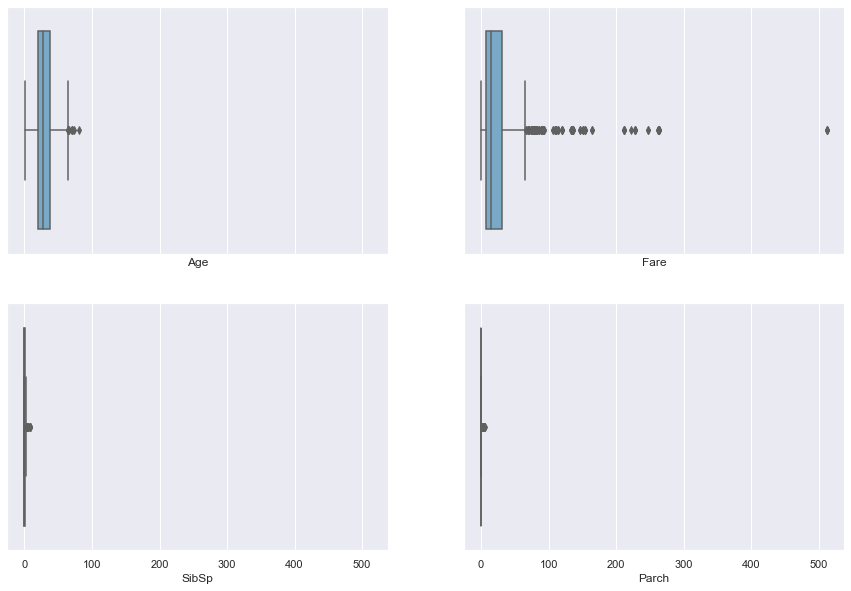

In [263]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

sns.boxplot(x=df_train['Age'], ax=axes[0, 0], palette='Blues')
sns.boxplot(x=df_train['Fare'], ax=axes[0, 1], palette='Blues')
sns.boxplot(x=df_train['SibSp'], ax=axes[1, 0], palette='Blues')
sns.boxplot(x=df_train['Parch'], ax=axes[1, 1], palette='Blues')

#### Number of people surviving by gender

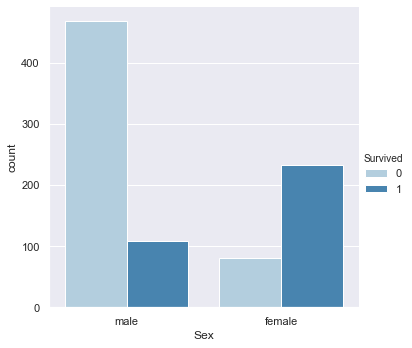

In [264]:
sns.catplot(x="Sex", hue="Survived", kind="count", palette='Blues', data=df_train)

#### Age of people classified as survivors or not

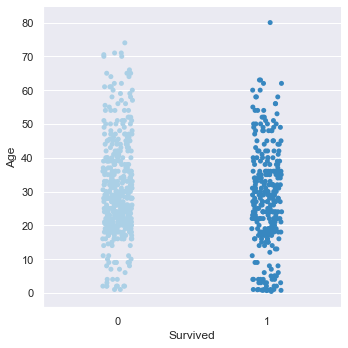

In [265]:
sns.catplot(x="Survived", y="Age", palette='Blues', data=df_train)

#### Number of surviving persons by age and gender

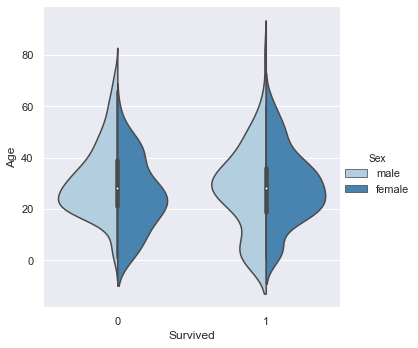

In [266]:
sns.catplot(x="Survived", y="Age", hue="Sex", palette='Blues',
            kind="violin", split=True, data=df_train);

Let's look at the same distribution in another chart.

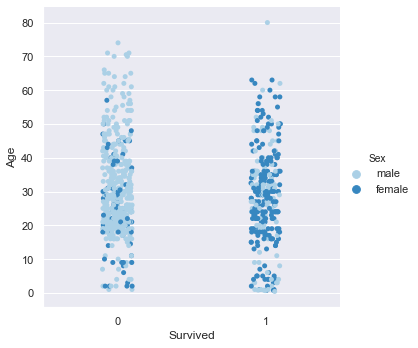

In [267]:
sns.catplot(x="Survived", y="Age", hue='Sex', palette='Blues', data=df_train)

#### Passengers by Class

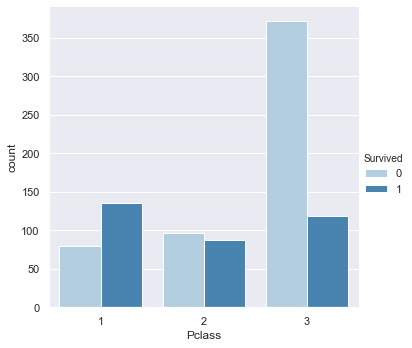

In [268]:
sns.catplot(x="Pclass", hue="Survived", kind="count", palette='Blues', data=df_train)

#### Survivors by Sex and Class

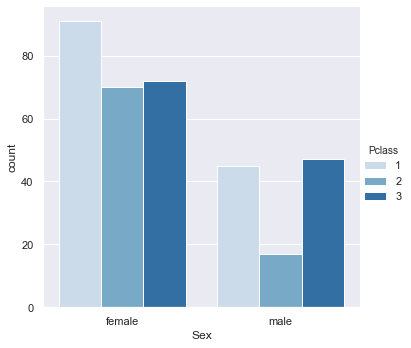

In [269]:
sns.catplot(x="Sex", hue="Pclass", kind="count", palette='Blues', data=df_train[df_train['Survived'] == 1])

#### Passengers by Class and Embarked

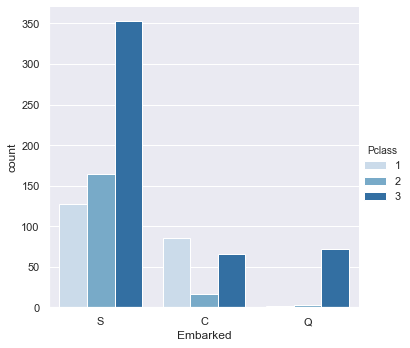

In [270]:
sns.catplot(x="Embarked", hue="Pclass", kind="count", palette='Blues', data=df_train)

#### Survivals by Class and Embarked

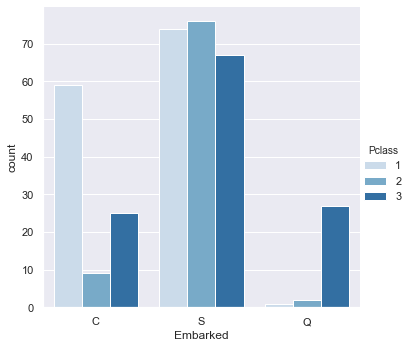

In [271]:
sns.catplot(x="Embarked", hue="Pclass", kind="count", palette='Blues', data=df_train[df_train['Survived'] == 1])

### Working with missing values

#### Determining the features that will be used 

In [272]:
df_train.drop(['PassengerId'], axis=1, inplace=True)

In [273]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Creating new Features

For fill the missing values in Age, we can use de median of the title in the Name of the passenger. For example: the passenger have de `Mr.` title, we can calculate the Age median of this title and fill the value.

##### Title feature

In [274]:
data = [df_train, df_test]

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(r'([A-Za-z]+)\.')
    print(dataset['Title'].value_counts())
    print('-----')

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Mme           1
Countess      1
Don           1
Lady          1
Capt          1
Sir           1
Jonkheer      1
Name: Title, dtype: int64
-----
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64
-----


In [275]:
titles_dict = { 'Other': 0 }
count = 1

for title in df_train['Title'].value_counts().index:
    titles_dict[title] = count
    count += 1

for dataset in data:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                             ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mrs'], inplace=True)
    dataset['Title'].replace(titles_dict, inplace=True)
    print(dataset['Title'].value_counts())
    print('-----')

1    529
2    186
3    127
4     40
0      9
Name: Title, dtype: int64
-----
1    241
2     79
3     73
4     21
0      4
Name: Title, dtype: int64
-----


##### Cabin and Deck features

In [276]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [277]:
df_train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,8


#### Fill Age missing values

In [278]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)

df_train["Age"].isnull().sum()    

0

In [279]:
df_test['Age'].isnull().sum()

0

#### Fill Embarked empty rows

In [280]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [281]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [282]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Fill Fare empty rows

In [283]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Change Sex column into numeric

In [284]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Dropping unused columns

In [285]:
data = [df_train, df_test]
for dataset in data:
    dataset.drop(['Name', 'Ticket'], axis=1, inplace=True)
    print(dataset.isnull().sum())
    print('-----')

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Deck        0
dtype: int64
-----
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64
-----


#### Let's see how the `df_train` looks like

In [286]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,0,22,1,0,7,0,1,8
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,2,8
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,1,8


In [287]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,892,3,0,22,0,0,7,2,1,8
1,893,3,1,38,1,0,7,0,3,8
2,894,2,0,26,0,0,9,2,1,8
3,895,3,0,35,0,0,8,0,1,8
4,896,3,1,35,1,1,12,0,3,8


## Now Machine, let's learn

In [288]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test  = df_test.drop("PassengerId", axis=1).copy()

### SGD

In [289]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [290]:
acc_sgd

61.73

### Random Forest

In [291]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

97.19

### Logistic Regression

In [292]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log

C:\Users\Gilberto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82.83

### K Nearest Neighbor

In [293]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

83.05

### Gaussian Naive Bayes

In [294]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

79.8

### Perceptron

In [295]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

acc_perceptron

C:\Users\Gilberto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


71.72

### Linear Support Vector Machine

In [296]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

acc_linear_svc

C:\Users\Gilberto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


65.21

### Decision Tree

In [297]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

acc_decision_tree

97.19

## Witch is the better model of them?

In [307]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
97.19,Random Forest
97.19,Decision Tree
83.05,KNN
82.83,Logistic Regression
79.80,Naive Bayes
71.72,Perceptron
65.21,Support Vector Machines
61.73,Stochastic Gradient Decent


### K-Fold Cross Validation

In [299]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.82222222 0.74157303 0.83146067 0.85393258 0.83146067
 0.78651685 0.75280899 0.8988764  0.875     ]
Mean: 0.8193851435705369
Standard Deviation: 0.04779989692043813


### Importance of the features

In [300]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age,0.239
Title,0.189
Fare,0.172
Sex,0.140
Pclass,0.079
Deck,0.066
SibSp,0.054
Embarked,0.036
Parch,0.025


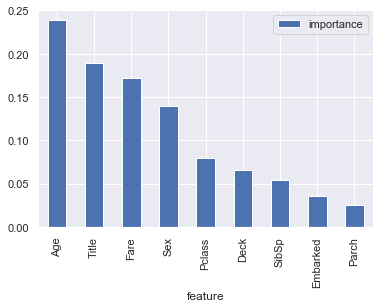

In [301]:
importances.plot.bar()

### Hyperparameter Tuning

In [306]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.19 %


```from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = { 
    "criterion" : ["gini", "entropy"], 
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
    "n_estimators": [100, 400, 700, 1000, 1500]
}

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)
clf.bestparams```

oob score: 82.04 %
91.36 %
